# 我们先来自己看一下这些模块的功能，BERTopic也只是把这些功能拼装起来了而已

In [32]:
# 20个句子，一部分讨论天气，一部分讨论自然语言处理
sentences = [
    "The weather today is sunny with clear skies.",
    "Tomorrow's forecast predicts heavy rain and thunderstorms.",
    "I love watching the sunset during mild weather evenings.",
    "Natural language processing is a field of study in computer science.",
    "NLP techniques are widely used in text analysis and language understanding.",
    "Weather forecasting relies on complex algorithms and data analysis.",
    "Understanding weather patterns is crucial for agriculture and disaster management.",
    "NLP algorithms can help in sentiment analysis of social media posts.",
    "The weather can be unpredictable, especially during transitional seasons.",
    "NLP models like BERT and GPT-3 have revolutionized language understanding tasks.",
    "Extreme weather events like hurricanes and tornadoes require advanced prediction models.",
    "NLP is used in virtual assistants like Siri and Alexa to understand human commands.",
    "Climate change is affecting global weather patterns.",
    "NLP can aid in machine translation, making communication across languages easier.",
    "Weather satellites provide real-time data for meteorologists to analyze.",
    "Semantic analysis is an important aspect of natural language processing.",
    "Weather phenomena such as El Niño impact weather worldwide.",
    "Part of speech tagging is a fundamental task in NLP.",
    "The weather in coastal areas is often influenced by ocean currents.",
    "NLP helps in chatbots to generate human-like responses."
]

# 1. Embedding

In [33]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embedding_model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

In [34]:
# 展示一下Embedding的能力
embeddings = embedding_model.encode(sentences)
print(embeddings.shape, embeddings)

(20, 384) [[-0.00087368  0.07574054  0.11562102 ... -0.02699839 -0.13160652
   0.07899172]
 [-0.0645291  -0.0372324   0.11404095 ... -0.03348763 -0.07219101
   0.05458359]
 [ 0.05412416  0.00382094  0.12769882 ...  0.03218497 -0.08884915
   0.02998092]
 ...
 [ 0.01936751  0.01480619  0.02865424 ...  0.11244407  0.02719994
   0.03334687]
 [ 0.00312427 -0.00348332  0.14544894 ...  0.01540684 -0.01159542
   0.10587737]
 [-0.06357921 -0.03346658  0.08694217 ...  0.15366903  0.04320052
  -0.01385405]]


# 2. 降维

在创建了文档的数字表示之后，我们必须降低这些表示的维数。由于维数灾难的存在，集群模型通常难以处理高维数据。有很多方法可以降低维数，如 PCA，但是在 BERTopic 中选择默认的 UMAP。这是一种技术，可以保持一些数据集的局部和全局结构时，降低其维数。
https://maartengr.github.io/BERTopic/algorithm/algorithm.html#1-embed-documents

In [35]:
from umap import UMAP
umap_model = UMAP(n_components=2, metric='cosine')

UMAP官方文档 https://umap-learn.readthedocs.io/en/latest/basic_usage.html

视频教程：https://www.bilibili.com/video/BV1qB4y1p7CF/?spm_id_from=333.337.search-card.all.click&vd_source=eace37b0970f8d3d597d32f39dec89d8

In [36]:
# 转换为低维表示
reduced_embeddings = umap_model.fit_transform(embeddings)
print(reduced_embeddings.shape, reduced_embeddings)

(20, 2) [[12.812426  -7.6344767]
 [12.373646  -8.142993 ]
 [13.022554  -7.2421017]
 [ 5.875539  -5.986935 ]
 [ 6.0638843 -5.442585 ]
 [12.727866  -9.012307 ]
 [13.442886  -8.853996 ]
 [ 5.5039425 -6.468625 ]
 [13.856337  -7.8624372]
 [ 5.3917537 -5.081037 ]
 [12.293061  -8.679683 ]
 [ 4.640278  -5.9602914]
 [13.792018  -8.339484 ]
 [ 4.832395  -5.329006 ]
 [12.932469  -8.515838 ]
 [ 6.287607  -6.1892047]
 [13.300953  -8.028255 ]
 [ 5.438404  -5.627225 ]
 [13.618681  -7.5132465]
 [ 5.104162  -5.9107757]]


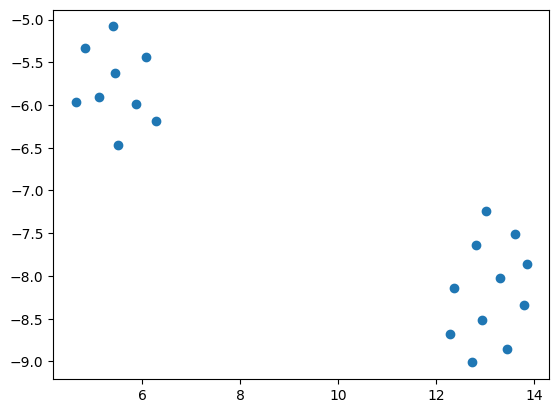

In [37]:
import matplotlib.pyplot as plt
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])

# 3. 聚类

In [38]:
from hdbscan import HDBSCAN
hdbscan_model = HDBSCAN(min_cluster_size=2)
hdbscan_model.fit(reduced_embeddings)
hdbscan_model.labels_

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
      dtype=int64)

# 4. 统计每个类的词频

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

topic1 = sentences[0] + sentences[1] + sentences[2] + sentences[5] + sentences[6] + sentences[8] + sentences[10] + sentences[12] + sentences[14] + sentences[16] + sentences[18]

topic2 = sentences[3] + sentences[4] + sentences[7] + sentences[9] + sentences[11] + sentences[13] + sentences[15] + sentences[17] + sentences[19]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform([topic1, topic2])

# 查看字典
vocab = vectorizer.get_feature_names_out()
print(len(vocab), vocab)

# 查看20个句子中，每个单词出现的次数
#  注意, 其顺序和词汇表保持一致, 比如第一行表示, 在第一个句子中, across出现0次, advanced出现0次...
X_arr = X.toarray()
print(X_arr.shape, X_arr)

128 ['across' 'advanced' 'affecting' 'agriculture' 'aid' 'alexa' 'algorithms'
 'an' 'analysis' 'analyze' 'and' 'are' 'areas' 'as' 'aspect' 'assistants'
 'be' 'bert' 'by' 'can' 'change' 'chatbots' 'clear' 'climate' 'coastal'
 'commands' 'communication' 'complex' 'computer' 'crucial' 'currents'
 'data' 'disaster' 'during' 'easier' 'el' 'especially' 'evenings' 'events'
 'extreme' 'field' 'for' 'forecast' 'forecasting' 'fundamental' 'generate'
 'global' 'gpt' 'have' 'heavy' 'help' 'helps' 'human' 'hurricanes'
 'impact' 'important' 'in' 'influenced' 'is' 'language' 'languages' 'like'
 'love' 'machine' 'making' 'management' 'media' 'meteorologists' 'mild'
 'models' 'natural' 'niño' 'nlp' 'ocean' 'of' 'often' 'on' 'part'
 'patterns' 'phenomena' 'posts' 'prediction' 'predicts' 'processing'
 'provide' 'rain' 'real' 'relies' 'require' 'responses' 'revolutionized'
 'satellites' 'science' 'seasons' 'semantic' 'sentiment' 'siri' 'skies'
 'social' 'speech' 'study' 'such' 'sunny' 'sunset' 'tagging' '

# 5 用c-TF-IDF生成主题表示
https://github.com/MaartenGr/BERTopic/blob/424cefc68ede08ff9f1c7e56ee6103c16c1429c6/tests/test_vectorizers/test_ctfidf.py#L37

In [40]:
from bertopic.vectorizers import ClassTfidfTransformer
class_vectorizer = ClassTfidfTransformer()
c_tf_idf = class_vectorizer.fit_transform(X).toarray()
print(c_tf_idf.shape, c_tf_idf)

(2, 128) [[0.         0.0463128  0.0463128  0.0463128  0.         0.
  0.03941387 0.         0.03261441 0.0463128  0.10902953 0.
  0.0463128  0.0463128  0.         0.         0.0463128  0.
  0.0463128  0.03541978 0.0463128  0.         0.0463128  0.0463128
  0.0463128  0.         0.         0.0463128  0.         0.0463128
  0.0463128  0.07882773 0.0463128  0.07882773 0.         0.0463128
  0.0463128  0.0463128  0.0463128  0.0463128  0.         0.07882773
  0.0463128  0.0463128  0.         0.         0.0463128  0.
  0.         0.0463128  0.         0.         0.         0.0463128
  0.0463128  0.         0.02600524 0.0463128  0.10402096 0.
  0.         0.03261441 0.0463128  0.         0.         0.0463128
  0.         0.0463128  0.0463128  0.03941387 0.         0.0463128
  0.         0.0463128  0.         0.0463128  0.0463128  0.
  0.07882773 0.0463128  0.         0.0463128  0.0463128  0.
  0.0463128  0.0463128  0.0463128  0.0463128  0.0463128  0.
  0.         0.0463128  0.         0.0463

In [41]:
# 提取重要的词，提取前三个
import numpy as np
topic1_important_words_index = np.argsort(c_tf_idf[0])[::-1] # 获取tf-idf值最高的下标
print(vocab[topic1_important_words_index[0]], vocab[topic1_important_words_index[1]], vocab[topic1_important_words_index[2]])

topic2_important_words_index = np.argsort(c_tf_idf[1])[::-1]
print(vocab[topic2_important_words_index[0]], vocab[topic2_important_words_index[1]], vocab[topic2_important_words_index[2]])

weather the and
nlp in language


# 其实到现在为止，我们已经拼装出来了BERTopic
# 如果我们使用BERTopic实现上述代码

In [42]:
from bertopic import BERTopic
# 20个句子，一部分讨论天气，一部分讨论自然语言处理
sentences = [
    "The weather today is sunny with clear skies.",
    "Tomorrow's forecast predicts heavy rain and thunderstorms.",
    "I love watching the sunset during mild weather evenings.",
    "Natural language processing is a field of study in computer science.",
    "NLP techniques are widely used in text analysis and language understanding.",
    "Weather forecasting relies on complex algorithms and data analysis.",
    "Understanding weather patterns is crucial for agriculture and disaster management.",
    "NLP algorithms can help in sentiment analysis of social media posts.",
    "The weather can be unpredictable, especially during transitional seasons.",
    "NLP models like BERT and GPT-3 have revolutionized language understanding tasks.",
    "Extreme weather events like hurricanes and tornadoes require advanced prediction models.",
    "NLP is used in virtual assistants like Siri and Alexa to understand human commands.",
    "Climate change is affecting global weather patterns.",
    "NLP can aid in machine translation, making communication across languages easier.",
    "Weather satellites provide real-time data for meteorologists to analyze.",
    "Semantic analysis is an important aspect of natural language processing.",
    "Weather phenomena such as El Niño impact weather worldwide.",
    "Part of speech tagging is a fundamental task in NLP.",
    "The weather in coastal areas is often influenced by ocean currents.",
    "NLP helps in chatbots to generate human-like responses."
]

# 核心代码是下面这一行，我们创建了一个BERTopic模型，其实就是在背后创建了：Embedding模型、UMAP降维模型、HDBSCAN聚类模型、CountVectorizer分词模型、c-tf-idf主题表示模型，然后从上到下将它拼装在了一起
# 这个min_topic_size=2，本质上是传递给HDBSCAN聚类模型的，说的是：一个类中至少需要包含两个文档
# 事实上我们在这里传给BERTopic()的参数，绝大多数都会传递给背后的Embedding、UMAP、HDBSCAN等具体模型
topic_model = BERTopic(min_topic_size=2) 

topic_model.fit_transform(sentences) # 拟合模型
topic_model.get_topic_info() # 获取主题聚类信息
# 可以看到得出的topic信息基本类似

,Topic,Count,Name,Representation,Representative_Docs
0,0,11,0_weather_the_and_is,"[weather, the, and, is, during, for, patterns,...","[The weather today is sunny with clear skies.,..."
1,1,9,1_nlp_in_of_language,"[nlp, in, of, language, is, analysis, and, nat...",[Natural language processing is a field of stu...


# 还可以用另外一种方式调用BERTopic
改编自官方示例 https://maartengr.github.io/BERTopic/algorithm/algorithm.html#code-overview

In [43]:
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic import BERTopic

sentences = [
    "The weather today is sunny with clear skies.",
    "Tomorrow's forecast predicts heavy rain and thunderstorms.",
    "I love watching the sunset during mild weather evenings.",
    "Natural language processing is a field of study in computer science.",
    "NLP techniques are widely used in text analysis and language understanding.",
    "Weather forecasting relies on complex algorithms and data analysis.",
    "Understanding weather patterns is crucial for agriculture and disaster management.",
    "NLP algorithms can help in sentiment analysis of social media posts.",
    "The weather can be unpredictable, especially during transitional seasons.",
    "NLP models like BERT and GPT-3 have revolutionized language understanding tasks.",
    "Extreme weather events like hurricanes and tornadoes require advanced prediction models.",
    "NLP is used in virtual assistants like Siri and Alexa to understand human commands.",
    "Climate change is affecting global weather patterns.",
    "NLP can aid in machine translation, making communication across languages easier.",
    "Weather satellites provide real-time data for meteorologists to analyze.",
    "Semantic analysis is an important aspect of natural language processing.",
    "Weather phenomena such as El Niño impact weather worldwide.",
    "Part of speech tagging is a fundamental task in NLP.",
    "The weather in coastal areas is often influenced by ocean currents.",
    "NLP helps in chatbots to generate human-like responses."
]

# 下面更可以看出，BERTopic是各个模型的堆叠组合⭐
# 我们可以选择每个模型都自己创建，以方便调节其参数

# Step 1 - Extract embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Step 2 - Reduce dimensionality
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')

# Step 3 - Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=2)

# Step 4 - Tokenize topics
vectorizer_model = CountVectorizer()

# Step 5 - Create topic representation
ctfidf_model = ClassTfidfTransformer()

# All steps together
topic_model = BERTopic(
  embedding_model=embedding_model,          # Step 1 - Extract embeddings
  umap_model=umap_model,                    # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,              # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,        # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,                # Step 5 - Extract topic words
)

topic_model.fit_transform(sentences) # 拟合模型
topic_model.get_topic_info() # 获取主题聚类信息

,Topic,Count,Name,Representation,Representative_Docs
0,0,11,0_weather_the_and_is,"[weather, the, and, is, during, for, patterns,...","[The weather today is sunny with clear skies.,..."
1,1,9,1_nlp_in_of_language,"[nlp, in, of, language, is, like, analysis, an...",[Natural language processing is a field of stu...
